<h1 align='center'>BitCoin Data Transformation Internal</h1>

In [1]:
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt

client = MongoClient("129.26.78.40:27017")
db = client['BitCoin']

In [31]:
collection_number = 11
db['blocks_{0}_aggregation'.format(collection_number)].aggregate([{"$project":
                                                                      {"tx_time":"$tx_time"}},                      
                                     {"$group": 
                                              {
                                                "_id": {"year":{"$year":"$tx_time"},
                                                        "month":{"$month":"$tx_time"},
                                                        "day": {"$dayOfMonth":"$tx_time"}, 
                                                        "hour":{"$hour":"$tx_time"}},
                                                "count":{ "$sum": 1}
                                                }
                                     },
                                     {"$out":"dates_aggregation_hours_{0}".format(collection_number)}],allowDiskUse=True)

db['blocks_{0}_aggregation'.format(collection_number)].aggregate([{"$project":
                                                                      {"tx_time":"$tx_time"}},                      
                                     {"$group": 
                                              {
                                                "_id": {"year":{"$year":"$tx_time"},
                                                        "month":{"$month":"$tx_time"},
                                                        "day": {"$dayOfMonth":"$tx_time"}, 
                                                        "hour":{"$hour":"$tx_time"},
                                                        "minute":{"$minute": "$tx_time" }},
                                                "count":{ "$sum": 1}
                                                }
                                     },
                                     {"$out":"dates_aggregation_minutes_{0}".format(collection_number)}],allowDiskUse=True)

In [45]:
import pandas as pd
from datetime import datetime

In [49]:
HOUR_TIME_SERIES = {}
for col_index in range(1,17):
    for A in db["dates_aggregation_hours_{0}".format(col_index)].find():
        date_time = datetime(A["_id"]["year"],A["_id"]["month"],A["_id"]["day"],A["_id"]["hour"])
        try:
            HOUR_TIME_SERIES[date_time] += A["count"]
        except:
            HOUR_TIME_SERIES[date_time] = A["count"]

In [54]:
MINUTE_TIME_SERIES = {}
for col_index in range(1,17):
    for A in db["dates_aggregation_minutes_{0}".format(col_index)].find():
        date_time = datetime(A["_id"]["year"],
                             A["_id"]["month"],
                             A["_id"]["day"],
                             A["_id"]["hour"],
                             A["_id"]["minute"])
        try:
            MINUTE_TIME_SERIES[date_time] += A["count"]
        except:
            MINUTE_TIME_SERIES[date_time] = A["count"]

In [52]:
%matplotlib inline 

In [60]:
pandas_hours = pd.TimeSeries(HOUR_TIME_SERIES)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: TimeSeries is deprecated. Please use Series
  if __name__ == '__main__':


In [61]:
pandas_hours.to_csv("/home/cesar/Desktop/hours.csv")

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: TimeSeries is deprecated. Please use Series
  if __name__ == '__main__':


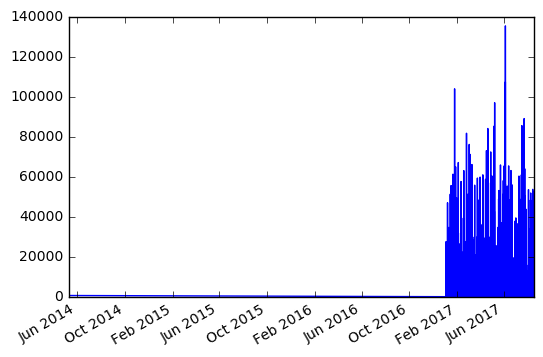

In [62]:
pandas_minutes = pd.TimeSeries(MINUTE_TIME_SERIES)
pandas_minutes.to_csv("/home/cesar/Desktop/minutes.csv")
pandas_minutes.plot()